In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [26]:
# Вхідні дані
N = 11
N2 = N*2
data = np.array([
    54-N2, 103-N2, 72, 92, 83, 81, 79, 53-N2, 68, 82, 94, 65, 97, 110-N2, 78, 82,
    63, 101-N2, 68, 87, 98, 95, 53-N2, 93, 78, 62, 57, 88, 99, 105-N2, 66, 73, 67,
    101-N2, 91, 83, 57, 55-N2, 81, 83, 89, 91, 85, 102, 88, 108-N2, 93, 58, 67,
    104-N2, 78, 85, 78, 85, 78, 108, 86, 91, 93, 88, 75,68, 94, 115-N2, 84, 101
])
n_intervals = 8
n = len(data)
n

66

In [27]:
# Будуємо варіаційний ряд
data.sort()
print(data)

[ 31  31  32  33  57  57  58  62  63  65  66  67  67  68  68  68  72  73
  75  78  78  78  78  78  79  79  79  81  81  81  82  82  82  83  83  83
  83  84  85  85  85  86  86  87  88  88  88  88  89  91  91  91  92  93
  93  93  93  94  94  95  97  98  99 101 102 108]


In [28]:
data_min = data.min()
print(f"Мінімальне значення ряду {data_min}")
data_max = data.max()
print(f"Максимальне значення ряду {data_max}")
R = data_max - data_min
print(f"Розмах вибірки R={R}")
w = R/n_intervals
print(f"Довжина інтервалу w={w}")

Мінімальне значення ряду 31
Максимальне значення ряду 108
Розмах вибірки R=77
Довжина інтервалу w=9.625


In [29]:
# При побудові таблиці частот як нижню межу першого інтервалу прийнято мінімальне
# значення вибірки. При підрахунку частот у випадку співпадіння елемента вибірки з
# верхньою межею відповідний елемент враховувався в даному інтервалі.
boundaries = [[data_min, data_min+w]]
boundary_left = boundaries[-1][1]
while boundary_left < data_max:
    boundary_left = boundaries[-1][1]
    boundary_right = boundary_left + w
    if np.abs(boundary_right - data_max) < w:
        boundary_right = data_max
    boundaries.append([boundary_left, boundary_right])
    boundary_left = boundary_right
print(boundaries)

[[31, 40.625], [40.625, 50.25], [50.25, 59.875], [59.875, 69.5], [69.5, 79.125], [79.125, 88.75], [88.75, 98.375], [98.375, 108]]


In [30]:
frequency_table = []
for boundary in boundaries:
    zi = (boundary[0] + boundary[1]) / 2
    selected_data = [number for number in data if number >= boundary[0] and number <= boundary[1]]
    ni = len(selected_data)
    ni_by_n = ni / n
    sum_ni_by_n = ni_by_n
    if len(frequency_table) > 0:
        sum_ni_by_n += frequency_table[-1][4]
    ni_by_wn = ni / (w * n)
    frequency_table.append([ boundary, zi, ni, ni_by_n, sum_ni_by_n, ni_by_wn ])
columns = ["Межі", "zi", "ni", "ni/n", "SUM(ni/n)", "ni/(wn)"]
df = pd.DataFrame(frequency_table, columns=columns)
display(df)

,Межі,zi,ni,ni/n,SUM(ni/n),ni/(wn)
0,"[31, 40.625]",35.8125,4,0.060606,0.060606,0.006297
1,"[40.625, 50.25]",45.4375,0,0.000000,0.060606,0.000000
2,"[50.25, 59.875]",55.0625,3,0.045455,0.106061,0.004723
3,"[59.875, 69.5]",64.6875,9,0.136364,0.242424,0.014168
4,"[69.5, 79.125]",74.3125,11,0.166667,0.409091,0.017316
5,"[79.125, 88.75]",83.9375,21,0.318182,0.727273,0.033058
6,"[88.75, 98.375]",93.5625,14,0.212121,0.939394,0.022039
7,"[98.375, 108]",103.1875,4,0.060606,1.000000,0.006297


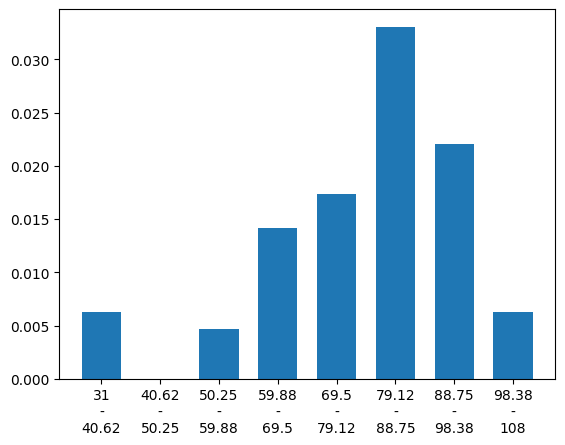

In [18]:
zi = df["zi"].values
zi_ticks = [f"{round(boundary[0], 2)}\n-\n{round(boundary[1], 2)}" for boundary in df["Межі"].values]
ni_by_wn = df["ni/(wn)"].values
plt.bar(zi, ni_by_wn, width=w*2/3)
plt.xticks(zi, zi_ticks)
plt.show() 

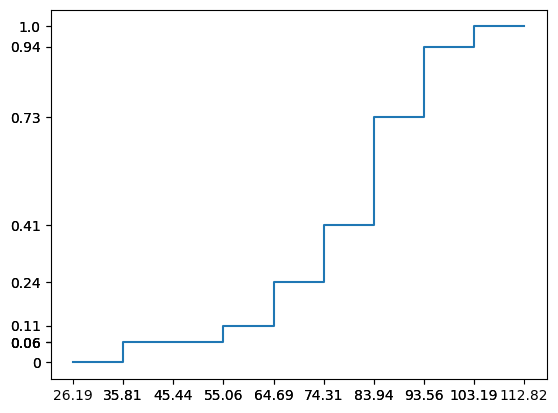

In [19]:
zi = df["zi"].values
sum_ni_by_n = df["SUM(ni/n)"].values
x_cumulative = [round(zi[0] - w, 2)]
y_cumulative = [0]
for i in range(len(zi)):
    x_cumulative.append(round(zi[i], 2))
    x_cumulative.append(round(zi[i], 2))
    y_cumulative.append(round(y_cumulative[-1], 2))
    y_cumulative.append(round(sum_ni_by_n[i], 2))
x_cumulative.append(round(x_cumulative[-1] + w, 2))
y_cumulative.append(y_cumulative[-1])
plt.plot(x_cumulative, y_cumulative)
plt.xticks(x_cumulative, x_cumulative)
plt.yticks(y_cumulative, y_cumulative)
plt.show() 

In [20]:
mean = data.mean()
print(f"середнє {mean}")
median = np.median(data, axis=0)
print(f"медіана {median}")
mode = stats.mode(data)[0]
print(f"мода {mode}")
Dx = 1/n * np.sum(data**2) - mean**2
print(f"дисперсія {Dx}")
sigma = np.sqrt(Dx)
print(f"стандартне відхилення {sigma}")

середнє 79.16666666666667
медіана 82.5
мода 78
дисперсія 270.5934343434337
стандартне відхилення 16.449724445820777


Text(112.01903494001799, 0, '112.02>|')

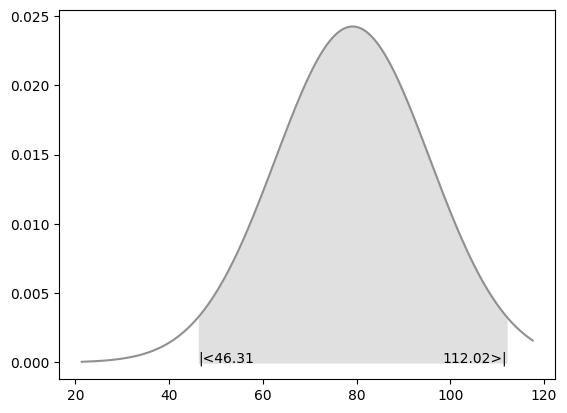

In [24]:
# побудувати 95% довірчий інтервал для математичного сподівання генеральної сукупності
confidence_interval = stats.t.interval(
    confidence=0.95,
    df=n-1,
    loc=mean,
    scale=sigma)
x_axis = np.arange(data_min-w, data_max+w, 0.1)
pdf = stats.norm.pdf(x_axis, mean, sigma)
plt.plot(x_axis, pdf, color="#909090")
low = confidence_interval[0]
high = confidence_interval[1]
plt.fill_between(x_axis, pdf, where=(low < x_axis) & (x_axis < high), color="#e0e0e0")
plt.text(low, 0, f"|<{round(low, 2)}", ha='left')
plt.text(high, 0, f"{round(high, 2)}>|", ha='right')

In [22]:
skewness = stats.skew(data, axis=0, bias=True)
print(f"ексцес {skewness}")
kurtosis = stats.kurtosis(data, axis=0, bias=True)
print(f"асиметричність {kurtosis}")

ексцес -1.2952311235269511
асиметричність 1.8156353101688714
